In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
#loading dataset
df = pd.read_csv(r'D:\Purity\ML_Zoomcamp\midterm project dataset\googleplaystore.csv')
print(df.shape) #getting the shape
df.head() #reading first five rows

(10841, 13)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Data Cleaning

In [3]:
#setting columns to lower case
df.columns = df.columns.str.lower() 
#replacing space with _
df.columns= df.columns.str.replace(' ', '_')
df.head()

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
#checking for duplicates
print(df.app.unique().shape)
print(df.app.nunique())

(9660,)
9660


In [5]:
#dropping duplicates
df.drop_duplicates(subset= 'app', inplace=True)
print(df.shape)

(9660, 13)


In [6]:
#checking variable types
df.dtypes

app                object
category           object
rating            float64
reviews            object
size               object
installs           object
type               object
price              object
content_rating     object
genres             object
last_updated       object
current_ver        object
android_ver        object
dtype: object

In [7]:
#getting number of uniques for each column
df.nunique()

app               9660
category            34
rating              40
reviews           5331
size               462
installs            22
type                 3
price               93
content_rating       6
genres             119
last_updated      1378
current_ver       2818
android_ver         33
dtype: int64

Dealing with missing values

In [8]:
#checking for missing values
df.isnull().sum()

app                  0
category             0
rating            1463
reviews              0
size                 0
installs             0
type                 1
price                0
content_rating       1
genres               0
last_updated         0
current_ver          8
android_ver          3
dtype: int64

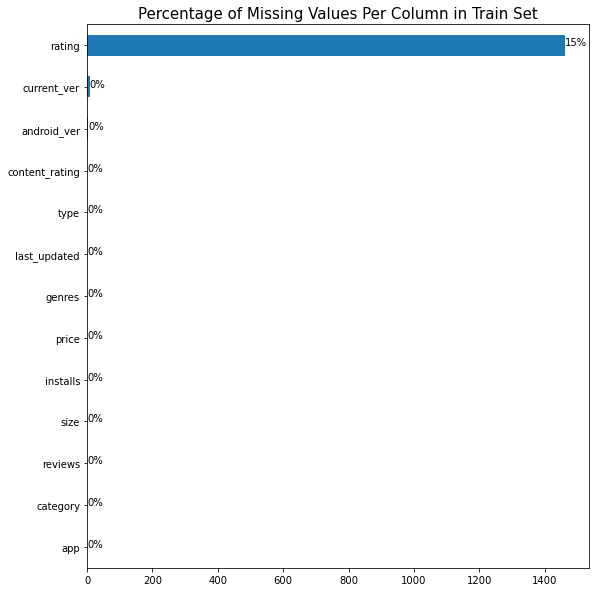

In [9]:
# plotting missing values 
ax = df.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in Train Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/df.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

In [10]:
#filling the missing values for column 'rating' with mean
df['rating'] = df['rating'].fillna(df['rating'].mean())

In [11]:
df.isnull().sum()

app               0
category          0
rating            0
reviews           0
size              0
installs          0
type              1
price             0
content_rating    1
genres            0
last_updated      0
current_ver       8
android_ver       3
dtype: int64

In [12]:
#dropping missing values for the rest of the columns
df.dropna(inplace=True)
df.isnull().sum()

app               0
category          0
rating            0
reviews           0
size              0
installs          0
type              0
price             0
content_rating    0
genres            0
last_updated      0
current_ver       0
android_ver       0
dtype: int64

Value counts

In [13]:
#creating list for categorical columns
cat_cols = list(df.select_dtypes(['object']).columns)
print(len(cat_cols))

12


In [14]:
# value_counts for categorical columns
for col in cat_cols:
    print(col)
    print(df[col].value_counts())
    print('\n')

app
Snapchat                                           1
BS Play                                            1
IF YOU TO EU PEGO                                  1
Share Music & Transfer Files - Xender              1
BU HANGİ ŞARKI ? - 2018                            1
                                                  ..
QR Droid                                           1
Marathi DP - status and message,jokes,Video app    1
CS Customizer                                      1
Age Calculator                                     1
Wheretoget: Shop in style                          1
Name: app, Length: 9648, dtype: int64


category
FAMILY                 1828
GAME                    959
TOOLS                   825
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         374
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281


Converting price and reviews to numerical columns

In [15]:
#removing $ character from price
value_list = []
col_list = list(df['price'].values)
for val in col_list:
    val = val.replace('$','')
    value_list.append(val)
df['price'] = value_list

In [16]:
#converting reviews and price to float
for col in ['reviews',  'price']:
    value_list = []
    col_list = list(df[col].values)
    for val in col_list:
        val = float(val)
        value_list.append(val)
    df[col] = value_list
df.dtypes

app                object
category           object
rating            float64
reviews           float64
size               object
installs           object
type               object
price             float64
content_rating     object
genres             object
last_updated       object
current_ver        object
android_ver        object
dtype: object

Creating a datetime column  and extracting features

In [17]:
#creating a column for datetime from the last updated column
from datetime import datetime
dates = []
date_list = list(df['last_updated'].values)
for date in date_list:
    date_object = datetime.strptime(date, "%B %d, %Y")#converting string to python datetime
    dates.append(date_object)
df['update_date'] = dates
df.head()

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver,update_date
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,2018-01-07
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,2018-01-15
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,2018-08-01
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,2018-06-08
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2018-06-20


In [18]:
#extracting features from datetime column
for date_feature in ['year', 'quarter', 'month']:
    df[date_feature] = getattr(df['update_date'].dt, date_feature)
df.head()

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver,update_date,year,quarter,month
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,2018-01-07,2018,1,1
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,2018-01-15,2018,1,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,2018-08-01,2018,3,8
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,2018-06-08,2018,2,6
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2018-06-20,2018,2,6


In [19]:
df.dtypes

app                       object
category                  object
rating                   float64
reviews                  float64
size                      object
installs                  object
type                      object
price                    float64
content_rating            object
genres                    object
last_updated              object
current_ver               object
android_ver               object
update_date       datetime64[ns]
year                       int64
quarter                    int64
month                      int64
dtype: object

In [20]:
#converting the variable types for date columns
cols = ['year', 'quarter', 'month']
for col in cols:
    df[col] = df[col].astype('object')

EDA

Descriptive analytics

In [21]:
#creating list for categorical columns and numerical columns
cat_cols = ['category', 'size', 'installs', 'type', 'content_rating', 'genres',
            'last_updated','current_ver','android_ver', 'year','quarter', 'month']
num_cols = ['price', 'reviews']

In [22]:
#summary of the numerical columns
df.describe()

,rating,reviews,price
count,9648.000000,9.648000e+03,9648.000000
mean,4.173583,2.168369e+05,1.100193
std,0.494475,1.832349e+06,16.861727
min,1.000000,0.000000e+00,0.000000
25%,4.000000,2.500000e+01,0.000000
50%,4.200000,9.690000e+02,0.000000
75%,4.500000,2.944925e+04,0.000000
max,5.000000,7.815831e+07,400.000000


<AxesSubplot:xlabel='rating', ylabel='Count'>

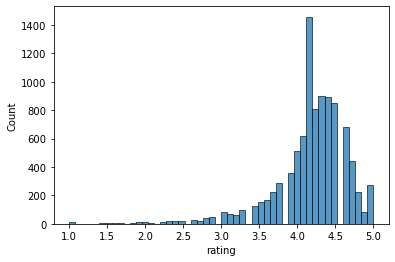

In [23]:
#histogram of target column
sns.histplot(df.rating, bins=50)

<AxesSubplot:xlabel='reviews', ylabel='Count'>

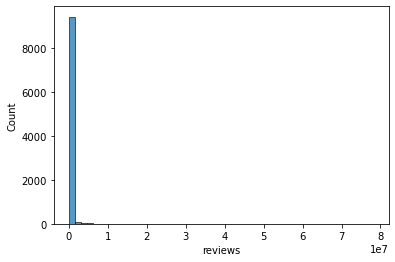

In [24]:
#histogram of reviews column
sns.histplot(df.reviews, bins=50)

<AxesSubplot:xlabel='price', ylabel='Count'>

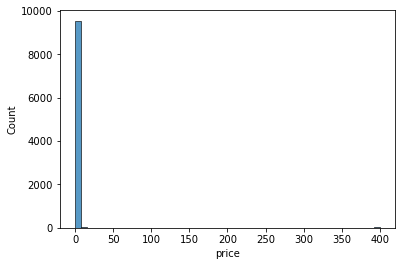

In [25]:
#histogram of price column
sns.histplot(df.price, bins=50)

<AxesSubplot:xlabel='rating', ylabel='Count'>

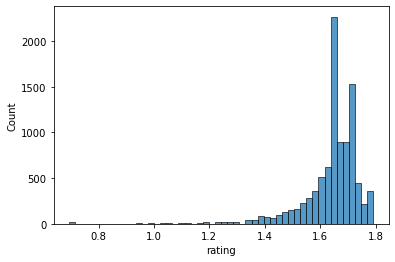

In [26]:
#applying log to the ratings column
rating_logs = np.log1p(df.rating)
#ploting histogram of log rating
sns.histplot(rating_logs, bins=50)

In [27]:
#creating column for log of rating
df['log_rating'] = rating_logs
df.head()

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver,update_date,year,quarter,month,log_rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,2018-01-07,2018,1,1,1.629241
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,2018-01-15,2018,1,1,1.589235
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,2018-08-01,2018,3,8,1.740466
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,2018-06-08,2018,2,6,1.704748
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2018-06-20,2018,2,6,1.667707


Correlation Analysis and 
Feature Importance

In [28]:
#correlation of numeric columns with target variable
df[num_cols].corrwith(df.rating)

price     -0.019538
reviews    0.054945
dtype: float64

In [29]:
#correlation of numeric column with log target variable
df[num_cols].corrwith(rating_logs)

price     -0.016291
reviews    0.051899
dtype: float64

In [30]:
#turning the numerical column to categorical column
cat_rating = pd.qcut(df.rating, q=10)
cat_rating

0          (4.0, 4.1]
1          (3.6, 4.0]
2          (4.5, 4.7]
3          (4.4, 4.5]
4          (4.2, 4.3]
             ...     
10836      (4.4, 4.5]
10837      (4.7, 5.0]
10838    (4.1, 4.175]
10839      (4.4, 4.5]
10840      (4.4, 4.5]
Name: rating, Length: 9648, dtype: category
Categories (10, interval[float64]): [(0.999, 3.6] < (3.6, 4.0] < (4.0, 4.1] < (4.1, 4.175] ... (4.3, 4.4] < (4.4, 4.5] < (4.5, 4.7] < (4.7, 5.0]]

In [31]:
#mutual information scores for the categorical variables
from sklearn.metrics import mutual_info_score
#creating a function
def mutual_score(series):
    return mutual_info_score(series, cat_rating)
mi = df[cat_cols].apply(mutual_score) #getting mutual info scores
pd.set_option('display.max_rows', None) #setting to print all rows
print(mi.sort_values(ascending=False)) #sorting in descending order

current_ver       0.891207
last_updated      0.553058
installs          0.324412
size              0.198353
genres            0.112540
category          0.066174
android_ver       0.042930
month             0.023832
year              0.021794
quarter           0.014560
content_rating    0.008292
type              0.004144
dtype: float64


Splitting the dataset

In [32]:
#importing train_test_split library
from sklearn.model_selection import train_test_split

In [33]:
#split to get test set
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
#split to get validation set
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)
#forming the label
y_train = df_train.log_rating.values
y_val = df_val.log_rating.values
y_test = df_test.log_rating.values

In [34]:
print(df_train.shape), print(df_val.shape), print(df_test.shape)

(5788, 18)
(1930, 18)
(1930, 18)


(None, None, None)

In [35]:
print(y_train.shape), print(y_val.shape), print(y_test.shape)

(5788,)
(1930,)
(1930,)


(None, None, None)

One-Hot encoding of categorical variables

In [36]:
#importing dictvectorizer
from sklearn.feature_extraction import DictVectorizer

In [37]:
dv = DictVectorizer(sparse=False)
train_dict = df_train[['current_ver','installs'] + ['reviews']].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[['current_ver','installs'] + ['reviews']].to_dict(orient='records')
X_val = dv.transform(val_dict)

test_dict = df_test[['current_ver','installs'] + ['reviews']].to_dict(orient='records')
X_test = dv.transform(test_dict)

Training Models

1. Linear regression

In [38]:
#importing linear regression
from sklearn.linear_model import LinearRegression

In [39]:
#training the model
lin_mod = LinearRegression(fit_intercept = False)
lin_mod.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

In [40]:
# examining value of intercept and coefficients
print(lin_mod.intercept_)
print(lin_mod.coef_)

0.0
[4.02223215e-02 3.70077208e-02 4.69846992e-03 ... 1.60872998e+00
 1.62032930e+00 1.95426986e-09]


In [41]:
#predicting the model
y_pred_R = lin_mod.predict(X_val)
y_pred_R[:20,]

array([1.60916318, 1.59833967, 1.60707946, 1.65058018, 1.63254787,
       1.69514993, 1.61769532, 1.63915088, 1.63544097, 1.62819888,
       1.65343468, 1.61731993, 1.63217135, 1.60745871, 1.5949227 ,
       1.66424356, 1.6708485 , 1.62896097, 1.61035842, 1.74788495])

In [42]:
#importing libraries for evaluation
from sklearn.metrics import mean_squared_error
import math
print('Root Mean Square Error = ' + str(math.sqrt(mean_squared_error(y_val, y_pred_R))))

Root Mean Square Error = 0.11726337236303992


2. Decision Trees

In [43]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

In [44]:
#training model
dt = DecisionTreeRegressor(max_depth=2)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

In [45]:
#predicting the model
y_pred_DT = dt.predict(X_val)
y_pred_DT[:20,]

array([1.622469  , 1.622469  , 1.622469  , 1.622469  , 1.622469  ,
       1.65489041, 1.622469  , 1.622469  , 1.622469  , 1.65489041,
       1.65489041, 1.622469  , 1.622469  , 1.622469  , 1.65489041,
       1.622469  , 1.68406966, 1.622469  , 1.622469  , 1.68406966])

In [46]:
#evaluation
print('Root Mean Square Error = ' + str(math.sqrt(mean_squared_error(y_val, y_pred_DT))))

Root Mean Square Error = 0.11277950470647602


In [47]:
print(export_text(dt, feature_names=dv.get_feature_names()))

|--- reviews <= 5718.50
|   |--- current_ver=41.9 <= 0.50
|   |   |--- value: [1.62]
|   |--- current_ver=41.9 >  0.50
|   |   |--- value: [0.69]
|--- reviews >  5718.50
|   |--- reviews <= 172416.50
|   |   |--- value: [1.65]
|   |--- reviews >  172416.50
|   |   |--- value: [1.68]



In [48]:
#selecting the best max_depth
scores = [] #creating an empty list
for d in [2, 6, 10, 14, 18]:#iterating max depth
    for s in [1, 5, 10, 15, 20, 50, 100, 200]:#iterating min sample leaf
        dt = DecisionTreeRegressor(max_depth=d, min_samples_leaf=s)
        dt.fit(X_train, y_train)
        y_pred = dt.predict(X_val)
        RMSE = math.sqrt(mean_squared_error(y_val, y_pred))
        scores.append((d,s,RMSE))
                     

In [49]:
columns = ['max_depth','min_samples_leaf', 'RMSE']
#creating dataframe
df_scores = pd.DataFrame(scores, columns=columns)
df_scores

,max_depth,min_samples_leaf,RMSE
0,2,1,0.112780
1,2,5,0.112232
2,2,10,0.112232
3,2,15,0.112232
4,2,20,0.112232
5,2,50,0.112232
6,2,100,0.112232
7,2,200,0.112232
8,6,1,0.111846
9,6,5,0.109982


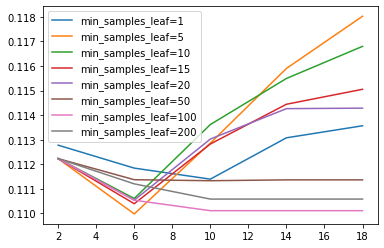

In [50]:
#plotting
for  s in [1, 5, 10, 15, 20, 50, 100, 200]:
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    
    plt.plot(df_subset.max_depth, df_subset.RMSE,
             label='min_samples_leaf=%d' % s)

plt.legend()

3. Random Forest

In [51]:
#importing libraries
from sklearn.ensemble import RandomForestRegressor

In [52]:
#training model
rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)
#predicting
y_pred_RF = rf.predict(X_val)
y_pred_RF[:20,]

array([1.62291984, 1.62874322, 1.66752453, 1.65223132, 1.53098726,
       1.69657515, 1.67148375, 1.64384936, 1.5003386 , 1.7227347 ,
       1.66473318, 1.70852492, 1.63767581, 1.67853558, 1.68440305,
       1.64384936, 1.69173089, 1.71780441, 1.63363594, 1.70835179])

In [53]:
#evaluation
print('Root Mean Square Error = ' + str(math.sqrt(mean_squared_error(y_val, y_pred_RF))))

Root Mean Square Error = 0.11909853929218382


In [54]:
#tuning the parameters
rf_scores = [] #creating an empty list
for d in [2, 6, 10, 14, 18]:#iterating max_depth
    for n in range(10, 101, 10):#iterating n_estimators
        rf = RandomForestRegressor(n_estimators=n, random_state=1, max_depth=d, n_jobs=-1)
        rf.fit(X_train, y_train)
        y_pred = dt.predict(X_val)
        RMSE = math.sqrt(mean_squared_error(y_val, y_pred))
        rf_scores.append((d,n,RMSE))

In [55]:
columns = ['max_depth', 'n_estimators', 'RMSE']
#creating dataframe
df_rfscores = pd.DataFrame(rf_scores, columns=columns)


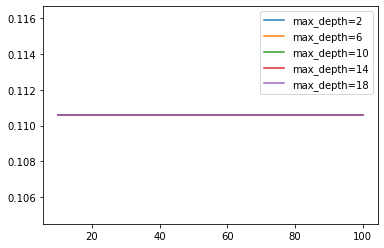

In [56]:
#plotting
for d in [2, 6, 10, 14, 18]:
    df_subset = df_rfscores[df_rfscores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.RMSE,
             label='max_depth=%d' % d)

plt.legend()

3. Xgboost

In [57]:
import sys
!{sys.executable} -m pip install xgboost

In [58]:
#importing xgboost
import xgboost as xgb

In [59]:
#creating Dmatrix for train and validation set
features = dv.get_feature_names()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [60]:
#creating watchlist
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [61]:
#training the model with eta 0.3
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}
model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=5,
                  evals=watchlist)

[0]	train-rmse:0.80405	val-rmse:0.80191
[5]	train-rmse:0.16838	val-rmse:0.17267
[10]	train-rmse:0.10156	val-rmse:0.11324
[15]	train-rmse:0.09675	val-rmse:0.11098
[20]	train-rmse:0.09566	val-rmse:0.11088
[25]	train-rmse:0.09479	val-rmse:0.11096
[30]	train-rmse:0.09336	val-rmse:0.11067
[35]	train-rmse:0.09286	val-rmse:0.11070
[40]	train-rmse:0.09236	val-rmse:0.11069
[45]	train-rmse:0.09197	val-rmse:0.11070
[50]	train-rmse:0.09145	val-rmse:0.11081
[55]	train-rmse:0.09090	val-rmse:0.11090
[60]	train-rmse:0.09043	val-rmse:0.11079
[65]	train-rmse:0.09009	val-rmse:0.11079
[70]	train-rmse:0.08966	val-rmse:0.11092
[75]	train-rmse:0.08934	val-rmse:0.11093
[80]	train-rmse:0.08907	val-rmse:0.11097
[85]	train-rmse:0.08863	val-rmse:0.11102
[90]	train-rmse:0.08843	val-rmse:0.11100
[95]	train-rmse:0.08823	val-rmse:0.11100
[99]	train-rmse:0.08801	val-rmse:0.11105


In [62]:
#training the model with eta 0.1
xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}
model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=5,
                  evals=watchlist)

[0]	train-rmse:1.03013	val-rmse:1.02760
[5]	train-rmse:0.61428	val-rmse:0.61276
[10]	train-rmse:0.37221	val-rmse:0.37203
[15]	train-rmse:0.23455	val-rmse:0.23652
[20]	train-rmse:0.16041	val-rmse:0.16542
[25]	train-rmse:0.12429	val-rmse:0.13231
[30]	train-rmse:0.10834	val-rmse:0.11868
[35]	train-rmse:0.10190	val-rmse:0.11373
[40]	train-rmse:0.09924	val-rmse:0.11200
[45]	train-rmse:0.09819	val-rmse:0.11151
[50]	train-rmse:0.09758	val-rmse:0.11135
[55]	train-rmse:0.09710	val-rmse:0.11129
[60]	train-rmse:0.09662	val-rmse:0.11121
[65]	train-rmse:0.09628	val-rmse:0.11119
[70]	train-rmse:0.09607	val-rmse:0.11121
[75]	train-rmse:0.09580	val-rmse:0.11121
[80]	train-rmse:0.09561	val-rmse:0.11122
[85]	train-rmse:0.09512	val-rmse:0.11118
[90]	train-rmse:0.09452	val-rmse:0.11106
[95]	train-rmse:0.09434	val-rmse:0.11106
[99]	train-rmse:0.09418	val-rmse:0.11105


In [63]:
#training the model with 0.01
xgb_params = {
    'eta': 0.01, 
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}
model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=5,
                  evals=watchlist)

[0]	train-rmse:1.13207	val-rmse:1.12940
[5]	train-rmse:1.07710	val-rmse:1.07450
[10]	train-rmse:1.02485	val-rmse:1.02233
[15]	train-rmse:0.97519	val-rmse:0.97275
[20]	train-rmse:0.92798	val-rmse:0.92563
[25]	train-rmse:0.88312	val-rmse:0.88086
[30]	train-rmse:0.84048	val-rmse:0.83831
[35]	train-rmse:0.79997	val-rmse:0.79789
[40]	train-rmse:0.76146	val-rmse:0.75949
[45]	train-rmse:0.72489	val-rmse:0.72302
[50]	train-rmse:0.69013	val-rmse:0.68837
[55]	train-rmse:0.65712	val-rmse:0.65546
[60]	train-rmse:0.62576	val-rmse:0.62421
[65]	train-rmse:0.59598	val-rmse:0.59454
[70]	train-rmse:0.56770	val-rmse:0.56636
[75]	train-rmse:0.54085	val-rmse:0.53962
[80]	train-rmse:0.51535	val-rmse:0.51422
[85]	train-rmse:0.49114	val-rmse:0.49013
[90]	train-rmse:0.46816	val-rmse:0.46727
[95]	train-rmse:0.44637	val-rmse:0.44561
[99]	train-rmse:0.42974	val-rmse:0.42909
